In [1]:
import csv, pandas as pd, numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib.inline
import astropy

UsageError: Line magic function `%matplotlib.inline` not found.


# Task 1:

Finding Average Distance to Pleiades Cluster

In [2]:
df = pd.read_csv("Pleiades_Cluster.csv")

In [3]:
df.head()

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623


In [4]:
print(df.columns)
print("Number of rows is",df.size/8)

Index(['gmag', 'ra', 'dec', 'plx', 'bp_rp', 'lum_val', 'teff_val',
       'radius_val'],
      dtype='object')
Number of rows is 987.0


In [5]:
df.dropna()

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623
7,12.179868,55.676693,23.502644,8.294176,1.369455,0.165852,4861.0350,0.574189
10,14.584626,55.786541,23.251838,4.447532,1.873214,0.085902,4112.1074,0.577466
...,...,...,...,...,...,...,...,...
979,9.779877,56.710653,23.239006,6.497724,0.746530,2.140879,5945.6665,1.378947
982,11.852763,56.920869,22.929795,5.779793,1.404244,0.513834,4526.7550,1.165440
983,8.186488,55.930264,24.374396,7.226433,0.352915,7.839014,7963.1953,1.470986
984,15.502478,56.525937,25.112616,2.085063,1.515169,0.141687,4443.0000,0.635280


In [6]:
plx = df['plx']

plx

0      3.486630
1      8.027063
2      8.509836
3      6.493298
4      2.675075
         ...   
982    5.779793
983    7.226433
984    2.085063
985    1.730391
986    4.196960
Name: plx, Length: 987, dtype: float64

In [7]:
d = 1000/plx
log10d = np.log10(d)
log10d

0      2.457594
1      2.095443
2      2.070079
3      2.187535
4      2.572664
         ...   
982    2.238088
983    2.141076
984    2.680881
985    2.761856
986    2.377065
Name: plx, Length: 987, dtype: float64

In [8]:
gmag = df['gmag']
print(f"Gmag: {gmag[0]}, log_10(d): {log10d[0]}")

Gmag: 15.684173, log_10(d): 2.457594146564539


In [9]:
M = gmag - 5*log10d + 5
M = pd.Series(M, name="Abs_Mag")

In [10]:
Dist_in_ly = pd.Series(d[d<200]*3.26156, name="Distance in ly")

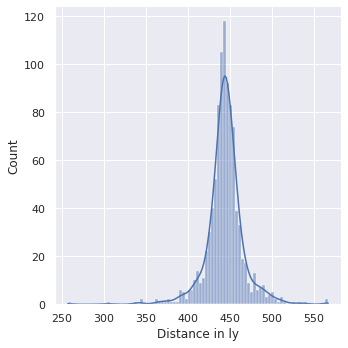

In [11]:
sns.displot(Dist_in_ly, kde=True)

In [12]:
dist_av = np.average(Dist_in_ly)
abs_mag_av = np.average(M.dropna())
print(f"Average Distance of Pleiades: {dist_av} ly")
print(f"Average Absolute Magnitude: {abs_mag_av}")

Average Distance of Pleiades: 444.3636117305794 ly
Average Absolute Magnitude: 9.32179920846402


# Task 2:

Calculating Luminosity with the formulae:
$\frac{L}{L_0} = 10^{\frac{4.77 - M}{2.55}}$

Then calculating $Radius_{eff}$ and $Temperature_{eff}$


In [13]:
lum_ratio = 10**((4.77 - M)/2.55)
lum_ratio

0       0.037841
1      11.969026
2       0.004511
3       0.135240
4       0.031740
         ...    
982     0.446754
983     7.899593
984     0.122188
985     0.031119
986     0.797392
Name: Abs_Mag, Length: 987, dtype: float64

In [21]:
np.average(lum_ratio)

2.6546701624485403

In [14]:
bp_rp = df["bp_rp"].dropna()
bp_rp

0      2.192428
1      0.188913
2      3.116683
3      1.591153
4      2.346289
         ...   
982    1.404244
983    0.352915
984    1.515169
985    2.049238
986    1.102659
Name: bp_rp, Length: 971, dtype: float64

## Temperature calulated vs Experimental

In [15]:
T_k = pd.Series(5601/((bp_rp + 0.4)**(2/3)) + 273.16, name="teff_calculated") # Converting to Kelvin, assuming the formula was for Celcius
df_temp_comp = pd.concat([T_k, df["teff_val"]], axis=1)
df_temp_comp

,teff_calculated,teff_val
0,3241.141218,3797.0000
1,8245.111351,8337.3330
2,2695.174607,3838.1667
3,3812.012567,4456.1650
4,3129.225168,3830.0100
...,...,...
982,4052.378443,4526.7550
983,7040.765218,7963.1953
984,3905.006532,4443.0000
985,3355.720126,NaN


In [16]:
rad_ratio = lum_ratio**0.5/(T_k/5778)**2
rad_ratio

0      0.618214
1      1.698992
2      0.308684
3      0.844889
4      0.607418
         ...   
982    1.358844
983    1.892857
984    0.765291
985    0.522992
986    1.444791
Length: 987, dtype: float64

## Radius Calculated vs Experimental

In [17]:
pd.concat((pd.Series(rad_ratio, name="radius_calc"), df["radius_val"]), axis=1)

,radius_calc,radius_val
0,0.618214,0.576938
1,1.698992,NaN
2,0.308684,NaN
3,0.844889,0.663230
4,0.607418,0.512623
...,...,...
982,1.358844,1.165440
983,1.892857,1.470986
984,0.765291,0.635280
985,0.522992,NaN


# Task 3:

Plotting the cluster itself, size on the basis of brightness.

In [18]:
np.max(gmag) # The faintest body has the maximum magnitude

19.885986

In [19]:
brightness = pd.Series(np.max(gmag) - gmag, name="Brightness")
brightness

0       4.201813
1      12.387819
2       3.783973
3       6.962634
4       3.431776
         ...    
982     8.033223
983    11.699498
984     4.383508
985     2.463916
986     7.979923
Name: Brightness, Length: 987, dtype: float64

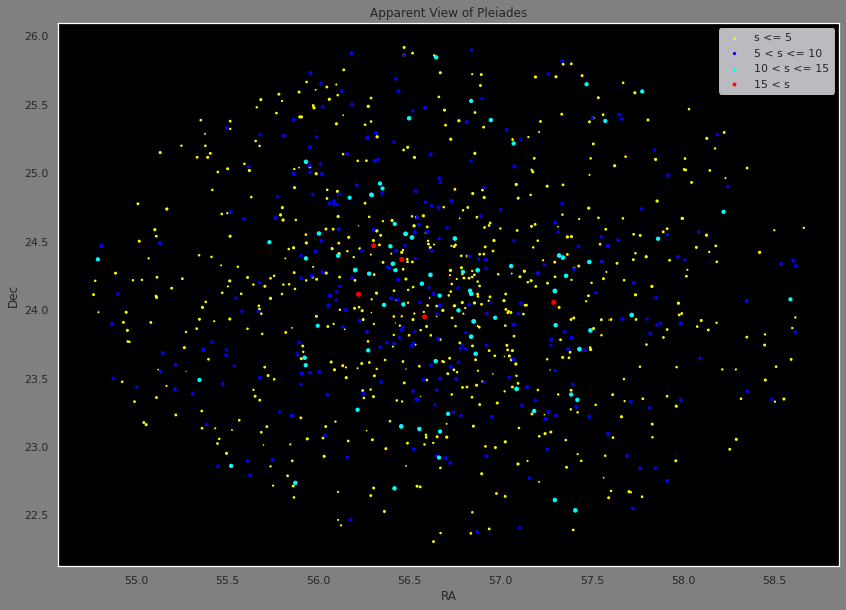

In [20]:
fig = plt.figure(figsize=(14,10), facecolor="grey")
pleiades = fig.add_subplot(111, facecolor="black")
brightness1 = []
for i, val in enumerate(brightness):
    if val<=5:
        brightness1.append(brightness[i])
    else:
        brightness1.append(0)
brightness2 = []
for i, val in enumerate(brightness):
    if 5<val<=10:
        brightness2.append(brightness[i])
    else:
        brightness2.append(0)
brightness3 = []
for i, val in enumerate(brightness):
    if 10<val<=15:
        brightness3.append(brightness[i])
    else:
        brightness3.append(0)
brightness4 = []
for i, val in enumerate(brightness):
    if val>15:
        brightness4.append(brightness[i])
    else:
        brightness4.append(0)

pleiades.scatter(df["ra"], df["dec"], s=brightness1, color="yellow", label="s <= 5")
pleiades.scatter(df["ra"], df["dec"], s=brightness2, color="blue", label="5 < s <= 10")
pleiades.scatter(df["ra"], df["dec"], s=brightness3, color="cyan", label="10 < s <= 15")
pleiades.scatter(df["ra"], df["dec"], s=brightness4, color="red", label="15 < s")
pleiades.set(title="Apparent View of Pleiades")
pleiades.grid(c='#727272')
pleiades.set_xlabel("RA")
pleiades.set_ylabel("Dec")
pleiades.legend()

# Task 4:

Plotting an HR Diagram for Pleiades Cluster

In [206]:
df_hr = pd.concat((df["bp_rp"], M), axis=1)
df_hr

,bp_rp,Abs_Mag
0,2.192428,8.396202
1,0.188913,2.020950
2,3.116683,10.751619
3,1.591153,6.985679
4,2.346289,8.590890
...,...,...
982,1.404244,5.662324
983,0.352915,2.481108
984,1.515169,7.098074
985,2.049238,8.612791


Text(0.6, 2.8, 'Turnoff Point')

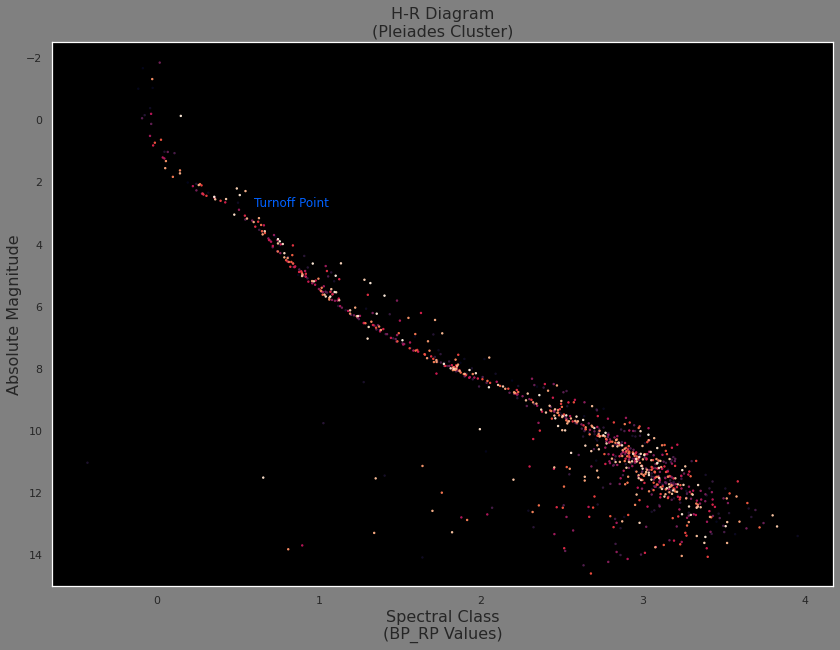

In [45]:
fig_hr = plt.figure(figsize=(14,10), facecolor="grey")
sub.scatter(df["bp_rp"], M, s=2, color="#FF9E00")
sub = fig_hr.add_subplot(111, facecolor="#000000")
sub.set_ylim(15,-2.5)
sub.grid()
sub.set_title("H-R Diagram\n(Pleiades Cluster)")
sub.title.set_fontsize(16)
sub.set_xlabel('Spectral Class\n(BP_RP Values)')
sub.xaxis.label.set_fontsize(16)
sub.set_ylabel('Absolute Magnitude')
sub.yaxis.label.set_fontsize(16)
sub.scatter(df["bp_rp"], M, s=2, c=color_arr)
# sub.scatter(df["bp_rp"], M, s=2, color="#FF9E00")
sub.annotate("Turnoff Point", (0.6,2.8), color="#0061FF")


To determine the age of a globular cluster, astronomers rely on the assumption that all the stars in the cluster formed at the same time and are the same distance from us. But the stars don’t all have the same mass. Because mass influences a star’s longevity, a star cluster gives us a special snapshot of a bunch of stars that are all the same age but at different points in their evolution.

While main sequence stars trace a diagonal line on the H-R diagram, red giant stars create a horizontal line in varying shades of red. This is called the red giant branch. As more of the big stars move onto the red giant branch, the top part of the main sequence disappears. This is called the main sequence turnoff. Because we know how a star’s mass determines how quickly it burns its fuel and where it falls on the diagram, we can use the main sequence turnoff to figure out the age of the cluster.

Age of Pleiades is around 150 million years, accepted universally (no pun intended)


![isochrones](./Isochrones_of_several_ages.png)

# Calculating Turnoff mass

This can be done by using the concept of Luminosity vs Mass empirical relationship:

$$\frac{L}{L_{sun}} = (\frac{M}{M_{sun}})^n$$
n is dependant upon the type of stellar object. As we want to find the turnoff mass, we need to find the mass of the stars near the turnoff point luminosity, which is around 2.8

In [86]:
n = 2.5
# assuming red_dwarfs...closest age calculated to the universally accepted one

In [80]:
mass_ratio = (lum_ratio)**(1/n)
mass_ratio = pd.Series(mass_ratio, name="mass_ratio")

In [81]:
df_mass = pd.concat((mass_ratio, lum_ratio), axis=1)

In [82]:
df_mass.shape

(987, 2)

In [83]:
for i,val in enumerate(df_mass["Abs_Mag"]):
    if abs(val-2.8) < 0.1:
        print("\n\n")
        print(df_mass.loc[i])




mass_ratio    1.529732
Abs_Mag       2.894267
Name: 177, dtype: float64



mass_ratio    1.499584
Abs_Mag       2.753767
Name: 621, dtype: float64


Now we know the mass ratio, which will then can be used to find the age of the cluster

$$\frac{t_{MS}}{t_{Sun}} = (\frac{M}{M_{Sun}})^{-2.5}$$

In [85]:
m_ratio = 1.529732
time_ratio = (m_ratio)**(-2.5)
age = time_ratio * 4.603e9
print(f"Quite Approx Age is: {age}")


Quite Approx Age is: 1590386189.4367714
